In [1]:
from stesml.model_tools import build_train_test_model
from stesml.model_tools import get_h_from_T_results
from stesml.model_tools import get_T_from_h_results

from stesml.data_tools import load_data

from stesml.plot_tools import plot_test_results
from stesml.plot_tools import plot_average_error

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_dir = "../data/Sulfur_Models/"
model_type = 'RandomForest' # Options: NN, XGBoost, RandomForest
target = 'h' # Options: Tavg, h
metric = 'rmse' # Options: rmse, r2
scale = False # Normalize data to a mean of 0 and STD of 1
n_repeats = 2 # Number of times to repeat 5-fold CV. Each repeat gives a different shuffle.

In [4]:
if model_type == 'NN':
    parameters = {'n_layers': 1, 'n_hidden_units': 82, 'batch_size': 2809, 'epochs': 20} # rmse = 1.699, r2 = 0.9983
    #parameters = {'n_layers': 1, 'n_hidden_units': 46, 'batch_size': 4298, 'epochs': 20} # rmese = 2.06, r2 = 0.9976
elif model_type == 'XGBoost':
    parameters = {'n_estimators': 300}
elif model_type == 'RandomForest':
    parameters = {'n_estimators': 2}

In [ ]:
result, addendum = build_train_test_model(data_dir, model_type, target, metric, scale, parameters, n_repeats)

Split #0, This Result: 5.6548, Average Result: 5.6548
Split #1, This Result: 6.2940, Average Result: 5.9744
Split #2, This Result: 4.5061, Average Result: 5.4850
Split #3, This Result: 4.5155, Average Result: 5.2426
Split #4, This Result: 16.5842, Average Result: 7.5109
Split #5, This Result: 11.9135, Average Result: 8.2447


In [16]:
# Choose the model (indexed by shuffle number) from which you would like to see results
chosen_model = addendum[3]

In [17]:
y_test = chosen_model[0]
y_hat = chosen_model[1]
scenario_index = chosen_model[2]
train_index = chosen_model[3]
test_index = chosen_model[4]

In [18]:
test_df = load_data(scenario_index, test_index)

In [19]:
test_df[target+"_hat"] = y_hat

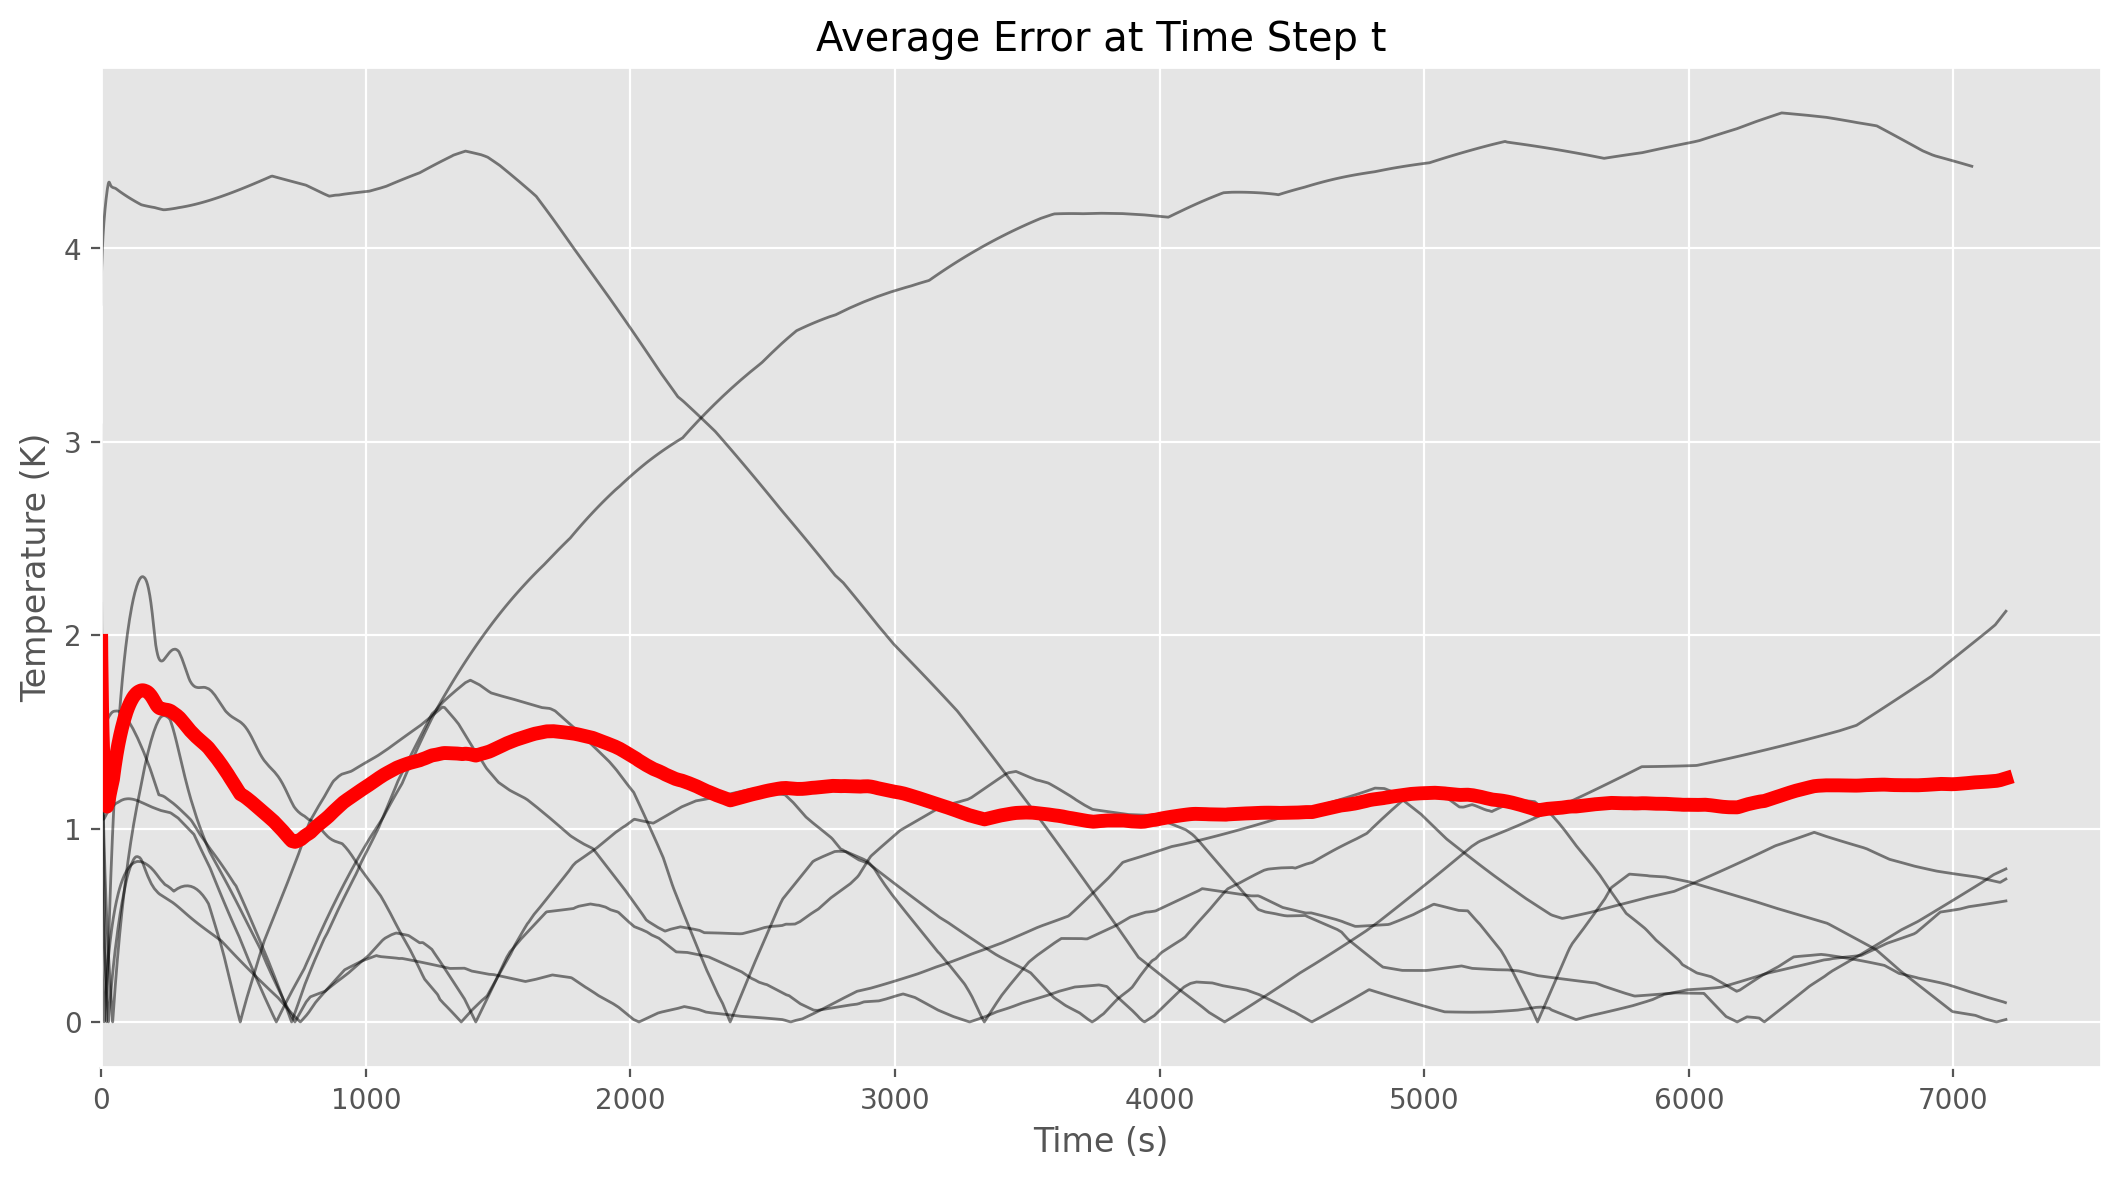

In [20]:
avg_error = plot_average_error(test_df, target=target)

<AxesSubplot:>

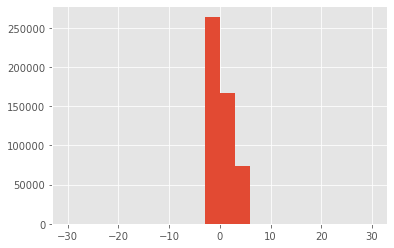

In [21]:
(test_df[target] - test_df[target+'_hat']).hist(bins=20, range=(-30, 30))

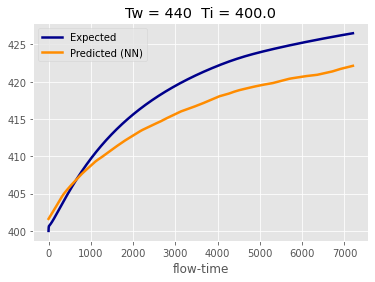

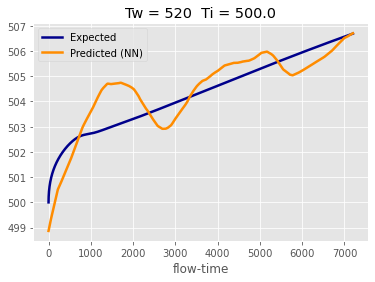

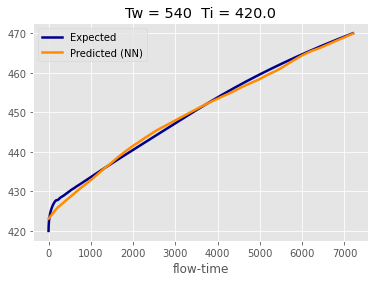

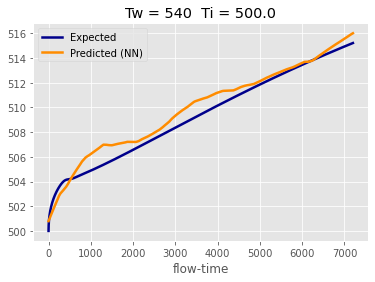

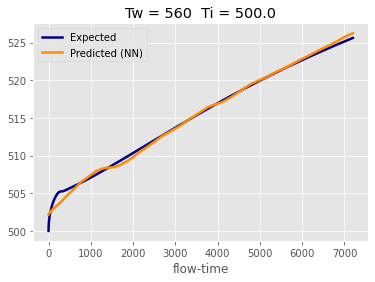

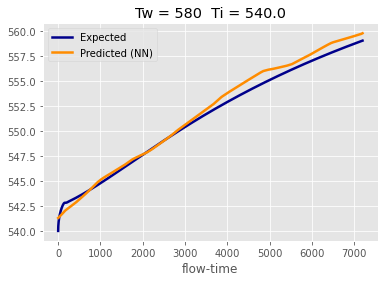

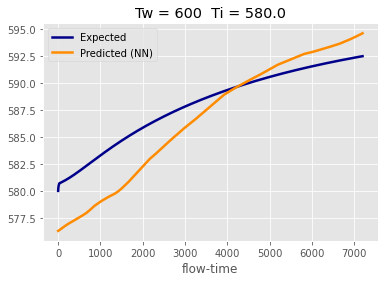

In [22]:
plot_test_results(test_df, model_type, target)

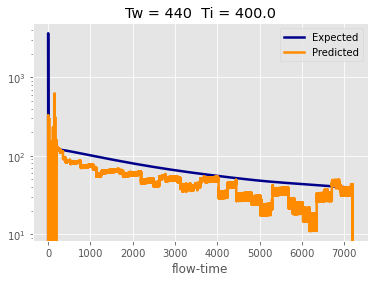

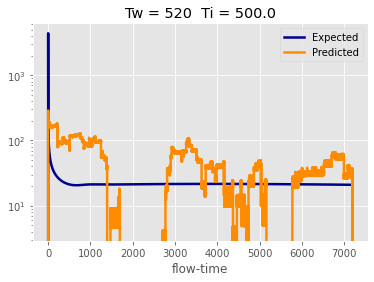

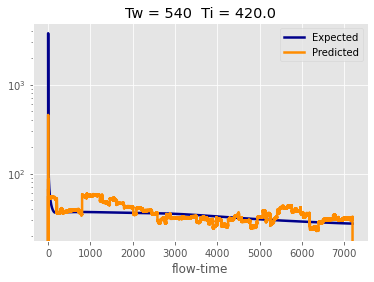

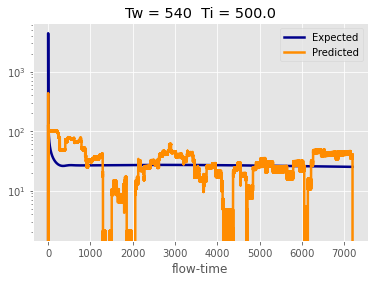

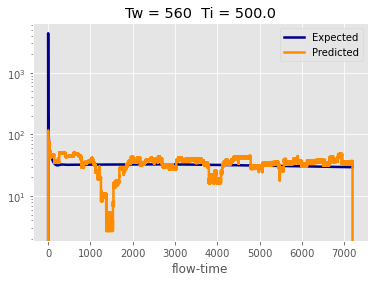

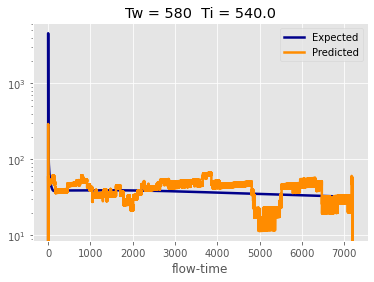

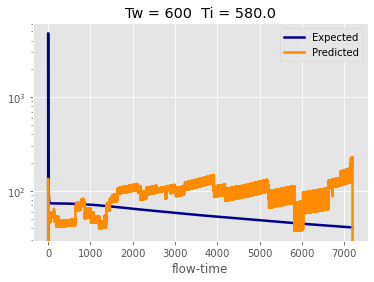

In [13]:
if target == 'Tavg':
    rmse, r2 = get_h_from_T_results(test_df, plot=True)
else:
    rmse, r2 = get_T_from_h_results(test_df, plot=True)

In [14]:
print(rmse)

60.67948218106647


In [15]:
print(r2)

-0.1166018527322612
